<a href="https://colab.research.google.com/github/Logan-Stark/DS-Unit-4-Sprint-1-NLP/blob/main/module2-vector-representations/LS_DS_422_BOW_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [ ]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg")
import en_core_web_lg
nlp = en_core_web_lg.load()

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Logan-Stark/DS-Unit-4-Sprint-1-NLP/main/module2-vector-representations/data/job_listings.csv')
df.head()


,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [ ]:
from bs4 import BeautifulSoup
import requests

def cleaner(text):
  df['description'] = df['description'].apply(lambda text: BeautifulSoup(text, 'html.parser').get_text())
  df['description'] = df['description'].str[2:-1]
  df['description'] = df['description'].apply(lambda text: text.replace('\n', ''))
  del df['Unnamed: 0']
cleaner(df)
##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task.")
                


In [ ]:
df.head()

,description,title
0,Job Requirements:\nConceptual understanding in...,Data scientist
1,"Job Description\n\nAs a Data Scientist 1, you ...",Data Scientist I
2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level
3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist
4,Location: USA \xe2\x80\x93 multiple locations\...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [ ]:
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer

tokenizer = Tokenizer(nlp.vocab)

In [ ]:
# T pipe

tokens = []
for doc in tokenizer.pipe(df['description']):
  doc_tokens = [token.text for token in doc]
  tokens.append(doc_tokens)
df['descr_tokens'] = tokens
df.head()

,description,title,descr_tokens
0,Job Requirements:\nConceptual understanding in...,Data scientist,"[Job, Requirements:\nConceptual, understanding..."
1,"Job Description\n\nAs a Data Scientist 1, you ...",Data Scientist I,"[Job, Description\n\nAs, a, Data, Scientist, 1..."
2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level,"[As, a, Data, Scientist, you, will, be, workin..."
3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist,"[$4,969, -, $6,756, a, monthContractUnder, the..."
4,Location: USA \xe2\x80\x93 multiple locations\...,Data Scientist,"[Location:, USA, \xe2\x80\x93, multiple, locat..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [ ]:
def tokenize(document):
  doc = nlp(document)
  return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [ ]:
vect = CountVectorizer(stop_words='english', max_features=1000)

vect.fit(df['description'])
dtm = vect.transform(df['description'])
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [ ]:
dtm

,000,10,100,2019,40,abilities,ability,able,academic,access,accommodation,accuracy,achieve,acquisition,action,actionable,activities,ad,addition,additional,address,ads,advance,advanced,advertising,affirmative,age,agency,agile,ai,algorithm,algorithms,amazon,americas,amounts,analyses,analysis,analyst,analysts,analytic,...,visualizations,voice,want,way,ways,web,welcome,wide,work,workforce,working,workplace,works,world,write,writing,written,www,x80,x83,x93,x94,x98,x99,x99ll,x99re,x99s,x99t,x9d,xa2,xa6,xae,xb7,xbb,xc2,xe2,xef,year,years,york
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,2,0,2,0,0,2,0,2,1,0,8,0,0,0,0,2,0,2,2,0,0,0,2,0,0,0,0,8,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,4,0,1,0,2,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,4,0,2,3,1
422,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,2,0,1,0,0,3,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
423,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,3,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
424,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,2,0,1,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,1,0


## 4) Visualize the most common word counts

In [ ]:
doc_len = [len(doc) for doc in df['description']]
print(doc_len)

[834, 4008, 853, 1737, 234, 2257, 2309, 4079, 3226, 3074, 2202, 3829, 4819, 2309, 4514, 3232, 3730, 910, 4079, 597, 3099, 3676, 2180, 5477, 879, 1306, 1494, 3312, 4819, 3885, 3228, 4778, 4693, 3877, 3282, 1808, 6865, 3752, 1913, 1774, 3665, 3653, 770, 2202, 2686, 1583, 3105, 1682, 2002, 3245, 7588, 2563, 3433, 2804, 2350, 7166, 867, 3121, 1479, 2201, 4627, 3602, 2545, 1830, 3091, 3973, 3312, 2627, 4284, 2227, 2220, 3496, 1021, 2685, 5599, 2660, 3954, 3726, 2950, 3586, 1440, 4000, 2368, 3929, 2115, 3665, 2420, 2108, 2599, 2418, 7588, 4153, 5431, 1176, 2456, 3074, 1219, 3582, 3091, 4089, 1682, 1283, 3729, 2712, 2025, 214, 519, 1770, 2210, 1832, 3429, 3532, 3582, 2020, 431, 3679, 4963, 6609, 3568, 2886, 3791, 3396, 7166, 5477, 6453, 2002, 2329, 1979, 2052, 4282, 4544, 3552, 3429, 1158, 2092, 5363, 4719, 4244, 770, 1590, 3501, 4521, 3433, 10399, 3790, 6247, 3248, 3382, 1702, 3262, 2639, 2158, 3910, 4846, 622, 3792, 3653, 8338, 2913, 132, 1816, 2051, 4707, 2262, 3637, 2600, 3637, 4000, 4822

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


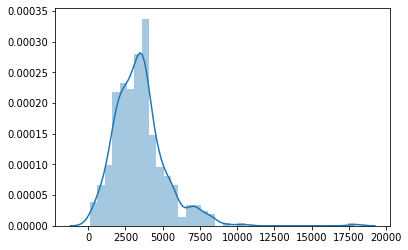

In [ ]:
import seaborn as sns

sns.distplot(doc_len);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [ ]:
tfidf = TfidfVectorizer(stop_words='english',
                        max_features=5000,
                        max_df = 93,
                        min_df = 3,
                        tokenizer = tokenize)


dtm = tfidf.fit_transform(df['description'])
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())
dtm.head()

,$,.\n\nabout,.\n\nperks\n\nhealth,/or,0,1,10,100,"100,000",11,12,15,17,2,20,200,"200,000",2012,2013,2015,2017,2018,2019,2020,24,24/7,25,3,3.0,30,300,3rd,3x,4,4-point,40,"40,000",401(k,401k,5,...,work.\n\nwe,work.\ncome,worker,workflow,workforce,working,workload,workplace,workplace\nand,workshop,workspace,world.\n\nwe,world\,world\xe2\x80\x99s,worldwide,worth,wrangle,wrangling,writing,www.civisanalytics.com,www.squarespace.com/about,x,xgboost,y,years\,years\nrequirements\n\xc2\xbb,years\xe2\x80\x99,yearthe,yes,york,you.\n\nabout,you\'ll,you\'re,you\n\nyou,you\xe2\x80\x99ll,you\xe2\x80\x99re,you\xe2\x80\x99ve,yrs,|,||
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.127498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.135362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.274723,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [ ]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)



NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.24824261, 1.27829534, 1.30770469, 1.32261418]]),
 array([[  0, 274, 115, 338, 366]]))

In [ ]:
ijob = [""" RELEASE MANAGER 

 

As a Release Manager at Bungie, you will play a critical role in operating a live service game and improving the delivery of game and storefront updates. You'll continually find ways to improve our current processes and will help build a major evolution of our game release pipeline. You will help the team manage the entire release lifecycle for our products, ensuring high quality and on-time delivery. Come help us elevate our game by creating some world-class game publishing services. 

 

During these uncertain times and rapidly changing environment surrounding COVID-19, all positions at Bungie are subject to onboarding and working virtually/remotely. 

 

RESPONSIBILITIES 

Help design and build automation and workflow systems to make Release Management more efficient, reliable, sustainable, and adaptable 
Write and update tools and scripts to improve release pipeline 
Work with internal and external partners to manage releases and improve release processes 
Build effective relationships with development, operations, and publishing teams within Bungie 
 

REQUIRED SKILLS 

C# programming experience 
Web framework experience (ASP.NET, React, etc.) 
Passion for continuous improvement 
Superior organization, communication, and collaboration skills 
Detail-oriented, focused, and composed under pressure 
Proven creative problem solver in a fast-paced and ever-changing environment 
Ability to coordinate with internal teams across the studio and effectively prioritize tasks 
Enthusiasm for and knowledge of the games industry 
 

NICE TO HAVE SKILLS 

Experience supporting a Games-as-a-Service title 
Experience building lightweight line-of-business apps 
Experience with asset management tools/systems 
Experience with SQL 
Experience with PowerShell or other scripting languages
Experience working within Agile environments 
Experience with CI/CD systems 
Experience with mobile app stores 
Knowledge of certification/release requirements for gaming platforms 
Understanding of the SDK development tools and release processes for gaming platforms """]

In [ ]:
new = tfidf.transform(ijob)

In [ ]:
nn.kneighbors(new.todense())

(array([[1.31422797, 1.31422797, 1.33473453, 1.33736009, 1.3546766 ]]),
 array([[272, 279, 305, 331, 209]]))

In [ ]:
df['description'][272]

"Summary\\nPosted: Dec 10, 2018\\nRole Number: 200020183\\nChanging the world is all in a day's work at Apple. If you love innovation, here's your chance to build a career. We invite you to join our mission in building and redefining App Store/Music/Movies/TV Shows/Books. Apple is critically invested in the success of its mobile ecosystem. App Store/Music/Movies/TV Shows/Books is a core asset that is at the crux of this ecosystem. Our team operates at the intersection of building highly scalable applications, analytics to understand data content and big data machine learning to improve the quality of the ecosystem.\\nBe ready to make something great when you come here. Dynamic, inspiring people and innovative, industry-defining technologies are the norm at Apple. The people who work here have reinvented and defined entire industries with our products and services. The same passion for innovation also applies to our business practices - strengthening our commitment to leave the world be

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 